<a href="https://colab.research.google.com/github/NithinR241328/Water_pollution-real-time-dataset-/blob/main/water_pollution_(new_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score,cross_validate,KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score,roc_curve,auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import normalize,StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_excel('aquaattributes.xlsx')
data.head()

,Stationcode,Locations,Lat,Lon,Capitalcity,State,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform,class
0,1001,BEAS AT U/S MANALI,32.244947,77.191080,Shimla,HIMACHAL PRADESH,9.0,9.0,8.0,85,0.1,0.2,106,397.0,yes
1,1002,BEAS AT D/S KULU,31.960582,77.114009,Shimla,HIMACHAL PRADESH,10.0,9.0,8.0,102,0.3,0.4,153,954.0,yes
2,1003,BEAS AT D/S AUT,26.887893,75.811484,Shimla,HIMACHAL PRADESH,11.0,9.0,8.0,96,0.2,0.3,58,653.0,yes
3,1004,BEAS AT U/S PANDON DAM,47.351943,19.633621,Shimla,HIMACHAL PRADESH,13.0,9.0,8.0,94,0.2,0.4,34,317.0,yes
4,1005,BEAS AT EXIT OF TUNNEL DEHAL POWER HOUSE,25.992786,91.826111,Shimla,HIMACHAL PRADESH,14.0,10.0,8.0,112,0.2,0.5,213,1072.0,yes


In [ ]:
data.shape

(1361, 15)

In [ ]:
data['class'].value_counts()

class
yes    1063
no      298
Name: count, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stationcode    1361 non-null   int64  
 1   Locations      1361 non-null   object 
 2   Lat            1294 non-null   float64
 3   Lon            1294 non-null   float64
 4   Capitalcity    1361 non-null   object 
 5   State          1360 non-null   object 
 6   Temperature    1327 non-null   float64
 7   D.O            1352 non-null   float64
 8   pH             1360 non-null   float64
 9   Conductivity   1324 non-null   object 
 10  B.O.D          1293 non-null   float64
 11  Nitrate        1152 non-null   object 
 12  Fecalcaliform  1173 non-null   object 
 13  Totalcaliform  1226 non-null   float64
 14  class          1361 non-null   object 
dtypes: float64(7), int64(1), object(7)
memory usage: 159.6+ KB


In [ ]:
data['Fecalcaliform'].unique()

array([106, 153, 58, 34, 213, 100, 445, 7, 9, 10, 3, 95, 158, 66, 370,
       133, 180, 185, 130, 189, 62, 63, 76, 85, 126, 204, 89, 159, 207,
       14, 305, 1275, 178, 637, 433, 12975, 29000, 2500, 22000, 105, 403,
       6, 4, 125, 27, 43, 53, 26, 23, 30, nan, 773, 11, 39, 25, 1800,
       16650, 5100, 650, 27650, 800, 1150, 8, 1161.67, 673.333, 783.333,
       420, 840, 3041.67, 3508.33, 1700, 6666.67, 38941.7, 5300, 4980,
       3358.33, 2491.67, 3408.33, 331.667, 2376.67, 8000, 40000, 13000,
       3122.22, 7500, 2766.67, 1187.5, 1922.22, 9000, 5666.67, 1588.89,
       2675, 2575, 7637.5, 2177.78, 1942.86, 3685.71, 5611.11, 105364,
       13572.7, 3063.64, 84666.7, 66666.7, 270333, 130750, 164833, 32500,
       20333.3, 275, 4865, 1616.17, 9.9, 31218, 27020, 69933.3, 9125.45,
       42000000, 110000000, 3283222, 21000, 718000, 37000, 2374000,
       284900, 6380100, 223780, 99030, 137630, 3195.14, 1450, 145000,
       2991.67, 260000, 230000000, 3566.67, 10500, 74500, 1092.5, 110

In [ ]:
data['Fecalcaliform'] = pd.to_numeric(data['Fecalcaliform'], errors='coerce')
data['Nitrate'] = pd.to_numeric(data['Nitrate'], errors='coerce')
data['Conductivity'] = pd.to_numeric(data['Conductivity'], errors='coerce')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stationcode    1361 non-null   int64  
 1   Locations      1361 non-null   object 
 2   Lat            1294 non-null   float64
 3   Lon            1294 non-null   float64
 4   Capitalcity    1361 non-null   object 
 5   State          1360 non-null   object 
 6   Temperature    1327 non-null   float64
 7   D.O            1352 non-null   float64
 8   pH             1360 non-null   float64
 9   Conductivity   1323 non-null   float64
 10  B.O.D          1293 non-null   float64
 11  Nitrate        1151 non-null   float64
 12  Fecalcaliform  1172 non-null   float64
 13  Totalcaliform  1226 non-null   float64
 14  class          1361 non-null   object 
dtypes: float64(10), int64(1), object(4)
memory usage: 159.6+ KB


In [ ]:
data.isnull().sum()

Stationcode        0
Locations          0
Lat               67
Lon               67
Capitalcity        0
State              1
Temperature       34
D.O                9
pH                 1
Conductivity      38
B.O.D             68
Nitrate          210
Fecalcaliform    189
Totalcaliform    135
class              0
dtype: int64

In [ ]:
data['State'].value_counts()

State
MAHARASHTRA                       164
KERALA                            108
HIMACHAL PRADESH                   99
RAJASTHAN                          99
WEST BENGAL                        96
UTTAR PRADESH                      94
BIHAR                              86
ANDHRA PRADESH                     65
ORISSA                             62
KARNATAKA                          57
GUJARAT                            49
ASSAM                              43
MADHYA PRADESH                     42
MAHARASHTRA                        40
TAMILNADU                          39
JHARKHAND                          26
GOA                                23
 PUNJAB                            23
CHHATTISGARH                       21
MANIPUR                            19
UTTARAKHAND                        17
TAMIL NADU                         14
ORISSA                             14
SIKKIM                              9
TRIPURA                             8
MEGHALAYA                           8
NAGALA

In [ ]:
null_state_data = data[data['State'].isnull()]

# Select 'state' and 'capital city' columns for the filtered rows
null_state_capital_city = null_state_data[['State', 'Capitalcity']]

# Print the result
print(null_state_capital_city)

     State Capitalcity
1248   NaN      Mumbai


In [ ]:
print("State:", data.loc[1248, 'State'])
print("Capital City:", data.loc[1248, 'Capitalcity'])

State: nan
Capital City: Mumbai


In [ ]:
data['State'].fillna('Maharashtra', inplace=True)
print("State:", data.loc[1248, 'State'])
print("Capital City:", data.loc[1248, 'Capitalcity'])

State: Maharashtra
Capital City: Mumbai


In [ ]:
data.isnull().sum()

Stationcode        0
Locations          0
Lat               67
Lon               67
Capitalcity        0
State              0
Temperature       34
D.O                9
pH                 1
Conductivity      38
B.O.D             68
Nitrate          210
Fecalcaliform    189
Totalcaliform    135
class              0
dtype: int64

In [ ]:
data=data.drop(['Stationcode','Lat','Lon'],axis=1)
data.head()

,Locations,Capitalcity,State,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform,class
0,BEAS AT U/S MANALI,Shimla,HIMACHAL PRADESH,9.0,9.0,8.0,85.0,0.1,0.2,106.0,397.0,yes
1,BEAS AT D/S KULU,Shimla,HIMACHAL PRADESH,10.0,9.0,8.0,102.0,0.3,0.4,153.0,954.0,yes
2,BEAS AT D/S AUT,Shimla,HIMACHAL PRADESH,11.0,9.0,8.0,96.0,0.2,0.3,58.0,653.0,yes
3,BEAS AT U/S PANDON DAM,Shimla,HIMACHAL PRADESH,13.0,9.0,8.0,94.0,0.2,0.4,34.0,317.0,yes
4,BEAS AT EXIT OF TUNNEL DEHAL POWER HOUSE,Shimla,HIMACHAL PRADESH,14.0,10.0,8.0,112.0,0.2,0.5,213.0,1072.0,yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Locations      1361 non-null   object 
 1   Capitalcity    1361 non-null   object 
 2   State          1361 non-null   object 
 3   Temperature    1327 non-null   float64
 4   D.O            1352 non-null   float64
 5   pH             1360 non-null   float64
 6   Conductivity   1323 non-null   float64
 7   B.O.D          1293 non-null   float64
 8   Nitrate        1151 non-null   float64
 9   Fecalcaliform  1172 non-null   float64
 10  Totalcaliform  1226 non-null   float64
 11  class          1361 non-null   object 
dtypes: float64(8), object(4)
memory usage: 127.7+ KB


In [ ]:
cat_cols = ['Locations','Capitalcity','State','class']

le = LabelEncoder()
for col in cat_cols:
  data[col] = le.fit_transform(data[col])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Locations      1361 non-null   int64  
 1   Capitalcity    1361 non-null   int64  
 2   State          1361 non-null   int64  
 3   Temperature    1327 non-null   float64
 4   D.O            1352 non-null   float64
 5   pH             1360 non-null   float64
 6   Conductivity   1323 non-null   float64
 7   B.O.D          1293 non-null   float64
 8   Nitrate        1151 non-null   float64
 9   Fecalcaliform  1172 non-null   float64
 10  Totalcaliform  1226 non-null   float64
 11  class          1361 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 127.7 KB


In [ ]:
data.head()

,Locations,Capitalcity,State,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform,class
0,100,27,12,9.0,9.0,8.0,85.0,0.1,0.2,106.0,397.0,1
1,89,27,12,10.0,9.0,8.0,102.0,0.3,0.4,153.0,954.0,1
2,86,27,12,11.0,9.0,8.0,96.0,0.2,0.3,58.0,653.0,1
3,101,27,12,13.0,9.0,8.0,94.0,0.2,0.4,34.0,317.0,1
4,94,27,12,14.0,10.0,8.0,112.0,0.2,0.5,213.0,1072.0,1


In [ ]:
data.isnull().sum()

Locations          0
Capitalcity        0
State              0
Temperature       34
D.O                9
pH                 1
Conductivity      38
B.O.D             68
Nitrate          210
Fecalcaliform    189
Totalcaliform    135
class              0
dtype: int64

In [ ]:
data.describe()

,Locations,Capitalcity,State,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform,class
count,1361.000000,1361.000000,1361.000000,1327.000000,1352.000000,1360.000000,1323.000000,1293.000000,1151.000000,1.172000e+03,1.226000e+03,1361.000000
mean,673.670096,16.191036,17.771492,25.159643,7.053729,7.605108,1232.058164,4.190794,9.146658,4.291545e+05,1.431256e+06,0.781043
std,388.981571,8.268666,10.169806,4.599248,1.946693,0.527686,3809.514217,11.840036,52.950002,7.899198e+06,2.632560e+07,0.413691
min,0.000000,0.000000,0.000000,5.000000,0.000000,5.000000,2.000000,0.000000,0.000000,1.000000e+00,5.000000e-03,0.000000
25%,337.000000,10.000000,12.000000,23.500000,6.329167,7.375000,216.666667,1.000000,0.333625,1.431250e+01,1.680000e+00,1.000000
50%,676.000000,18.000000,18.000000,26.208300,7.200000,7.700000,417.250000,2.060000,0.982500,1.200000e+02,2.514167e+02,1.000000
75%,1008.000000,22.000000,27.000000,27.761350,7.800000,7.984375,781.641667,3.933333,2.542788,7.745000e+02,1.600000e+03,1.000000
max,1347.000000,30.000000,34.000000,65.000000,30.366667,9.575000,65700.000000,222.000000,920.000000,2.300000e+08,6.700000e+08,1.000000


1361 rows

In [ ]:
data['Temperature'] = data['Temperature'].fillna(data['Temperature'].mean())
data['D.O'] = data['D.O'].fillna(data['D.O'].mean())
data['pH'] = data['pH'].fillna(data['pH'].mean())
data['Conductivity'] = data['Conductivity'].fillna(data['Conductivity'].mean())
data['B.O.D'] = data['B.O.D'].fillna(data['B.O.D'].mean())
data['Nitrate'] = data['Nitrate'].fillna(data['Nitrate'].mean())
data['Fecalcaliform'] = data['Fecalcaliform'].fillna(data['Fecalcaliform'].mean())
data['Totalcaliform'] = data['Totalcaliform'].fillna(data['Totalcaliform'].mean())

In [ ]:
data.isnull().sum()

Locations        0
Capitalcity      0
State            0
Temperature      0
D.O              0
pH               0
Conductivity     0
B.O.D            0
Nitrate          0
Fecalcaliform    0
Totalcaliform    0
class            0
dtype: int64

In [ ]:
sc = StandardScaler()

#totalcaliform = data['Totalcaliform'].values.reshape(-1, 1)
#scaled_totalcaliform = sc.fit_transform(totalcaliform)
#data['Totalcaliform'] = scaled_totalcaliform

#Fecalcaliform = data['Fecalcaliform'].values.reshape(-1, 1)
#scaled_Fecalcaliform = sc.fit_transform(Fecalcaliform)
#data['Fecalcaliform'] = scaled_totalcaliform


In [ ]:
X=data.drop(['class'],axis=1)
y=data['class']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Epoch 1/20
34/34 [==============================] - 1s 3ms/step - loss: 0.6444 - accuracy: 0.6875
Epoch 2/20
34/34 [==============================] - 0s 2ms/step - loss: 0.5472 - accuracy: 0.7877
Epoch 3/20
34/34 [==============================] - 0s 2ms/step - loss: 0.4954 - accuracy: 0.7923
Epoch 4/20
34/34 [==============================] - 0s 3ms/step - loss: 0.4602 - accuracy: 0.8079
Epoch 5/20
34/34 [==============================] - 0s 2ms/step - loss: 0.4321 - accuracy: 0.8226
Epoch 6/20
34/34 [==============================] - 0s 3ms/step - loss: 0.4075 - accuracy: 0.8493
Epoch 7/20
34/34 [==============================] - 0s 2ms/step - loss: 0.3852 - accuracy: 0.8594
Epoch 8/20
34/34 [==============================] - 0s 2ms/step - loss: 0.3627 - accuracy: 0.8741
Epoch 9/20
34/34 [==============================] - 0s 2ms/step - loss: 0.3406 - accuracy: 0.8778
Epoch 10/20
34/34 [==============================] - 0s 3ms/step - loss: 0.3187 - accuracy: 0.8860
Epoch 11/20
34/34 [

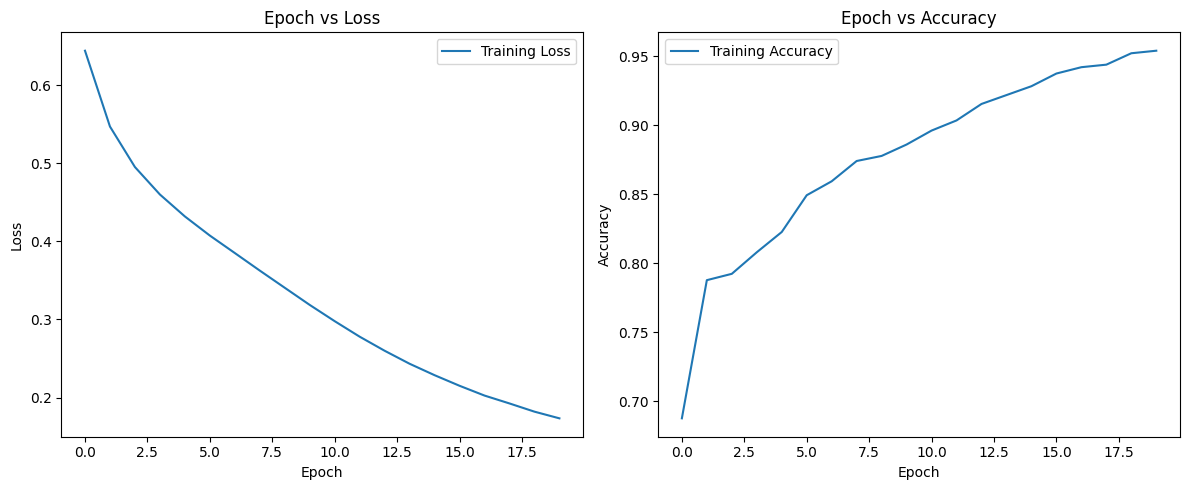

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Creating a feedforward neural network model
model = Sequential()

# Adding input layer and hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Adding output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
#history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_test, y_test))
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)
#history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_test, y_test))
# Evaluating the model's performance
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

plt.figure(figsize=(12, 5))

# Plotting epoch vs loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend()

# Plotting epoch vs accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
#plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already defined

# Initialize a list to store individual FNN models
fnn_models = []

# Define different FNN models with different hyperparameters
fnn_model_1 = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', solver='adam', random_state=42)
fnn_model_2 = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', random_state=42)
fnn_model_3 = MLPClassifier(hidden_layer_sizes=(256, 128, 64), activation='relu', solver='adam', random_state=42)

# Train individual FNN models
for model in [fnn_model_1, fnn_model_2, fnn_model_3]:
    model.fit(X_train, y_train)
    fnn_models.append(model)

# Create a meta-learner model (Random Forest classifier in this example)
meta_learner = GradientBoostingClassifier(random_state=42)

# Create a stacked ensemble classifier
stacked_ensemble_fnn3 = StackingClassifier(estimators=[('fnn_model_1', fnn_model_1),
                                                  ('fnn_model_2', fnn_model_2),
                                                  ('fnn_model_3', fnn_model_3)],
                                      final_estimator=meta_learner)

stacked_ensemble_fnn3.fit(X_train, y_train)

# Make predictions on the test set
ensemble_predictions2 = stacked_ensemble_fnn3.predict(X_test)

# Calculate accuracy of the stacked ensemble classifier
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions2)
print("Ensemble Accuracy:", ensemble_accuracy)

Ensemble Accuracy: 0.9597069597069597


In [ ]:

import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already defined

# Initialize a list to store individual FNN models
fnn_models = []

# Define different FNN models with different hyperparameters
fnn_model_1 = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', solver='adam', random_state=42)
fnn_model_2 = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', random_state=42)
fnn_model_3 = MLPClassifier(hidden_layer_sizes=(256, 128, 64), activation='relu', solver='adam', random_state=42)
fnn_model_4 = MLPClassifier(hidden_layer_sizes=(32,), activation='relu', solver='adam', random_state=42)
fnn_model_5 = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', random_state=42)
fnn_model_6 = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu', solver='adam', random_state=42)

# Train individual FNN models
for model in [fnn_model_1, fnn_model_2, fnn_model_3, fnn_model_4, fnn_model_5, fnn_model_6]:
    model.fit(X_train, y_train)
    fnn_models.append(model)

# Create a meta-learner model (Gradient Boosting classifier in this example)
meta_learner = GradientBoostingClassifier(random_state=42)

# Create a stacked ensemble classifier
stacked_ensemble_fnn6 = StackingClassifier(estimators=[('fnn_model_1', fnn_model_1),
                                                  ('fnn_model_2', fnn_model_2),
                                                  ('fnn_model_3', fnn_model_3),
                                                  ('fnn_model_4', fnn_model_4),
                                                  ('fnn_model_5', fnn_model_5),
                                                  ('fnn_model_6', fnn_model_6)],
                                      final_estimator=meta_learner)

stacked_ensemble_fnn6.fit(X_train, y_train)

# Make predictions on the test set
ensemble_predictions3 = stacked_ensemble_fnn6.predict(X_test)

# Calculate accuracy of the stacked ensemble classifier
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions3)
print("Ensemble Accuracy:", ensemble_accuracy)

Ensemble Accuracy: 0.9743589743589743


In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already defined

# Initialize a list to store individual FNN models
fnn_models = []

# Define different FNN models with different hyperparameters
fnn_model_1 = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', solver='adam', random_state=42)
fnn_model_2 = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', random_state=42)
fnn_model_3 = MLPClassifier(hidden_layer_sizes=(256, 128, 64), activation='relu', solver='adam', random_state=42)
fnn_model_4 = MLPClassifier(hidden_layer_sizes=(32,), activation='relu', solver='adam', random_state=42)
fnn_model_5 = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', random_state=42)
fnn_model_6 = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu', solver='adam', random_state=42)
fnn_model_7 = MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32), activation='relu', solver='adam', random_state=42)
fnn_model_8 = MLPClassifier(hidden_layer_sizes=(512, 256, 128, 64, 32), activation='relu', solver='adam', random_state=42)
fnn_model_9 = MLPClassifier(hidden_layer_sizes=(64,), activation='tanh', solver='adam', random_state=42)
fnn_model_10 = MLPClassifier(hidden_layer_sizes=(128, 64), activation='tanh', solver='adam', random_state=42)

# Train individual FNN models
for model in [fnn_model_1, fnn_model_2, fnn_model_3, fnn_model_4, fnn_model_5,
              fnn_model_6, fnn_model_7, fnn_model_8, fnn_model_9, fnn_model_10]:
    model.fit(X_train, y_train)
    fnn_models.append(model)

# Create a meta-learner model (Gradient Boosting classifier in this example)
meta_learner = GradientBoostingClassifier(random_state=42)

# Create a stacked ensemble classifier
stacked_ensemble_fnn10 = StackingClassifier(estimators=[('fnn_model_'+str(i), model) for i, model in enumerate(fnn_models)],
                                      final_estimator=meta_learner)

stacked_ensemble_fnn10.fit(X_train, y_train)

# Make predictions on the test set
ensemble_predictions4 = stacked_ensemble_fnn10.predict(X_test)

# Calculate accuracy of the stacked ensemble classifier
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions4)
print("Ensemble Accuracy:", ensemble_accuracy)

Ensemble Accuracy: 0.989010989010989


In [ ]:
import pandas as pd
import plotly.express as px

# Define the models and their accuracies
models = ['FNN', 'Stacked 10 FNN', 'Stacked 15 FNN','Stacked 20 FNN']
accuracy = [0.923, 0.9890, 0.9853, 0.9743]

# Create a DataFrame
df = {'Model': models, 'Accuracy': accuracy}
df = pd.DataFrame(df)

# Create a bar plot with the text attribute to display accuracy values above the bars
fig = px.bar(df, x='Model', y='Accuracy', color='Model', title='Accuracy of the Models', template='simple_white', text='Accuracy')

fig.update_layout(
    width=1000,
    height=500,
    title={
        'text': 'Accuracy of the Models',
        'y':0.95,  # Position of the title (y-axis)
        'x':0.5,   # Position of the title (x-axis)
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

# Update the position of the text
fig.update_traces(textposition='outside')

# Show the plot
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Define the models and their accuracies
models = ['FNN', 'Stacked 3 FNN','Stacked 6 FNN', 'Stacked 10 FNN', 'Stacked 15 FNN','Stacked 20 FNN']
accuracy = [0.923, 0.9597, 0.9743, 0.9890, 0.9853, 0.9743]

# Create a DataFrame
df = {'Model': models, 'Accuracy': accuracy}
df = pd.DataFrame(df)

# Create a bar plot with the text attribute to display accuracy values above the bars
fig = px.bar(df, x='Model', y='Accuracy', color='Model', title='Accuracy of the Models', template='simple_white', text='Accuracy')


# Update the position of the text
fig.update_layout(
    width=1000,
    height=500,
    title={
        'text': 'Accuracy of the Models',
        'y':0.95,  # Position of the title (y-axis)
        'x':0.5,   # Position of the title (x-axis)
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

# Update the position of the text
fig.update_traces(textposition='outside')

# Show the plot
fig.show()


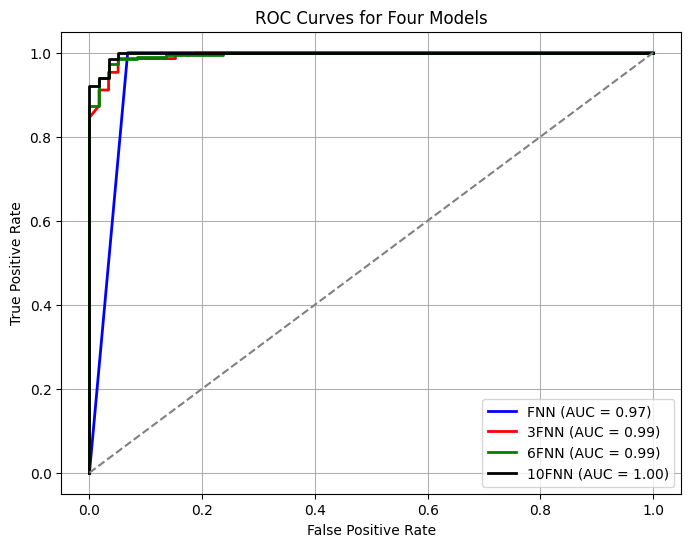

In [ ]:
#1
y_test_numerical1 = y_test.astype(int)
y_pred_prob1 = model.predict(X_test)

fpr1, tpr1, _ = roc_curve(y_test_numerical1,y_pred_prob1)
auc1 = auc(fpr1, tpr1)

#2
y_test_numerical2 = y_test.astype(int)
y_pred_prob2 = stacked_ensemble_fnn3.predict_proba(X_test)[:, 1]

fpr2, tpr2, _ = roc_curve(y_test_numerical2,y_pred_prob2)
auc2 = auc(fpr2, tpr2)

#3
y_test_numerical3 = y_test.astype(int)
y_pred_prob3 = stacked_ensemble_fnn6.predict_proba(X_test)[:, 1]

fpr3, tpr3, _ = roc_curve(y_test_numerical3,y_pred_prob3)
auc3 = auc(fpr3, tpr3)

#4
y_test_numerical4 = y_test.astype(int)
y_pred_prob4 = stacked_ensemble_fnn10.predict_proba(X_test)[:, 1]

fpr4, tpr4, _ = roc_curve(y_test_numerical4,y_pred_prob4)
auc4 = auc(fpr4, tpr4)

plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'FNN (AUC = {auc1:.2f})')
plt.plot(fpr2, tpr2, color='red', lw=2, label=f'3FNN (AUC = {auc2:.2f})')
plt.plot(fpr3, tpr3, color='green', lw=2, label=f'6FNN (AUC = {auc3:.2f})')
plt.plot(fpr4, tpr4, color='black', lw=2, label=f'10FNN (AUC = {auc4:.2f})')


# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Four Models')
plt.legend(loc='lower right')
plt.grid(True)

# Show plot
plt.show()